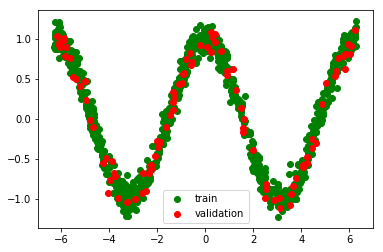

epoch 0, cost = 29.0098
epoch 100, cost = 23.5028
epoch 200, cost = 19.5069
epoch 300, cost = 14.6435
epoch 400, cost = 10.335
epoch 500, cost = 6.73916
epoch 600, cost = 4.04134
epoch 700, cost = 2.33503
epoch 800, cost = 1.44689
epoch 900, cost = 1.00611
epoch 1000, cost = 0.793651
epoch 1100, cost = 0.695983
epoch 1200, cost = 0.65367
epoch 1300, cost = 0.63507
epoch 1400, cost = 0.624084


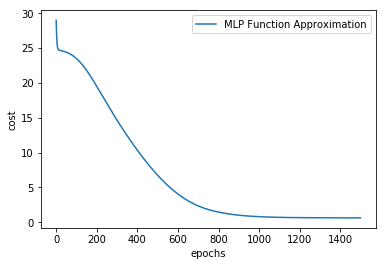

In [4]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt


np.random.seed(1000) 

function_to_learn = lambda x : np.cos(x) + 0.1 * np.random.randn(*x.shape)
layer_1_neurons = 10
NUM_points = 1000
#TRAIN_SPLIT = .8
batch_size = 100
NUM_EPOCHS = 1500


all_x = np.float32(np.random.uniform(-2 * math.pi, 2 * math.pi, (1, NUM_points))).T
np.random.shuffle(all_x)


train_size = int(900)
#the first 700 points are in the training set 
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

#the last 300 are in the validation set
x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

plt.figure(1)
plt.scatter(x_training, y_training, c = 'green', label = 'train')
plt.scatter(x_validation, y_validation, c = 'red', label = 'validation')
plt.legend()
plt.show()

X = tf.placeholder(tf.float32, [None, 1], name = "X")
Y = tf.placeholder(tf.float32, [None, 1], name = "Y")

#first layer
#Number of neurons = 10
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], minval = -1, maxval = 1, dtype = tf.float32))
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype = tf.float32))
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

#output layer
#Number of neurons = 10
w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1], minval = -1, maxval = 1, dtype = tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype = tf.float32))

#build the model
model = tf.matmul(h, w_o) + b_o

#minimize the cost function (model - Y)
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))

#Start the Learning phase
sess = tf.Session()
sess.run(tf.global_variables_initializer())

errors = []
for i in range(NUM_EPOCHS):
    for start, end in zip(range(0, len(x_training), batch_size),range(batch_size, len(x_training), batch_size)):
        sess.run(train_op, { X: x_training[start:end], Y: y_training[start:end] })
    cost = sess.run(tf.nn.l2_loss(model - y_validation), { X:x_validation })
    errors.append(cost)
    if i % 100 == 0: print("epoch %d, cost = %g" % (i, cost))

plt.plot(errors,label='MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()